In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.3.1
sys.version_info(major=3, minor=6, micro=7, releaselevel='final', serial=0)
matplotlib 3.3.2
numpy 1.18.4
pandas 1.1.4
sklearn 0.23.2
tensorflow 2.3.1
tensorflow.keras 2.4.0


In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split

xtrain_all, xtest, ytrain_all, ytest = train_test_split(
    housing.data, housing.target, random_state=7)
xtrain, xvalid, ytrain, yvalid = train_test_split(
    xtrain_all ,ytrain_all, random_state=11)
print(xtrain.shape, ytrain.shape)
print(xvalid.shape, yvalid.shape)
print(xtest.shape, ytest.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xvalid_scaled= scaler.transform(xvalid)
xtest_scaled = scaler.transform(xtest)

In [7]:
# 多输入
input_wide = keras.layers.Input(shape=[5])
input_deep = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation='relu')(input_deep)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_wide, hidden2])
output = keras.layers.Dense(1)(concat)  # 需要调用
model = keras.models.Model(inputs=[input_wide, input_deep], outputs=[output])

model.summary()
model.compile(loss="mean_squared_error", 
              optimizer = keras.optimizers.SGD(0.001))
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-5)]

Model: "functional_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           210         input_6[0][0]                    
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 30)           930         dense_6[0][0]                    
_______________________________________________________________________________________

In [9]:
# 训练时需要拆分
xtrain_scaled_wide = xtrain_scaled[:, :5]
xtrain_scaled_deep = xtrain_scaled[:, 2:]
xvalid_scaled_wide = xvalid_scaled[:, :5]
xvalid_scaled_deep = xvalid_scaled[:, 2:]
xtest_scaled_wide = xtest_scaled[:, :5]
xtest_scaled_deep = xtest_scaled[:, 2:]

history = model.fit([xtrain_scaled_wide, xtrain_scaled_deep], 
                     ytrain, 
                    validation_data=([xvalid_scaled_wide, xvalid_scaled_deep], 
                                      yvalid),
                    epochs=100, callbacks=callbacks)

Epoch 1/100
363/363 [==============================] - 0s 1ms/step - loss: 1.7211 - val_loss: 0.9262
Epoch 2/100
363/363 [==============================] - 0s 758us/step - loss: 0.7820 - val_loss: 0.7808
Epoch 3/100
363/363 [==============================] - 0s 784us/step - loss: 0.7008 - val_loss: 0.7230
Epoch 4/100
363/363 [==============================] - 0s 787us/step - loss: 0.6549 - val_loss: 0.6804
Epoch 5/100
363/363 [==============================] - 0s 804us/step - loss: 0.6214 - val_loss: 0.6494
Epoch 6/100
363/363 [==============================] - 0s 771us/step - loss: 0.5947 - val_loss: 0.6230
Epoch 7/100
363/363 [==============================] - 0s 777us/step - loss: 0.5730 - val_loss: 0.5993
Epoch 8/100
363/363 [==============================] - 0s 818us/step - loss: 0.5538 - val_loss: 0.5799
Epoch 9/100
363/363 [==============================] - 0s 911us/step - loss: 0.5381 - val_loss: 0.5648
Epoch 10/100
363/363 [==============================] - 0s 914us/step - los

Epoch 80/100
363/363 [==============================] - 0s 883us/step - loss: 0.3789 - val_loss: 0.3969
Epoch 81/100
363/363 [==============================] - 0s 851us/step - loss: 0.3782 - val_loss: 0.3981
Epoch 82/100
363/363 [==============================] - 0s 894us/step - loss: 0.3774 - val_loss: 0.3948
Epoch 83/100
363/363 [==============================] - 0s 886us/step - loss: 0.3767 - val_loss: 0.3976
Epoch 84/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3763 - val_loss: 0.3952
Epoch 85/100
363/363 [==============================] - 0s 958us/step - loss: 0.3759 - val_loss: 0.3935
Epoch 86/100
363/363 [==============================] - 0s 846us/step - loss: 0.3748 - val_loss: 0.3938
Epoch 87/100
363/363 [==============================] - 0s 878us/step - loss: 0.3746 - val_loss: 0.3924
Epoch 88/100
363/363 [==============================] - 0s 822us/step - loss: 0.3738 - val_loss: 0.3934
Epoch 89/100
363/363 [==============================] - 0s 831us/s

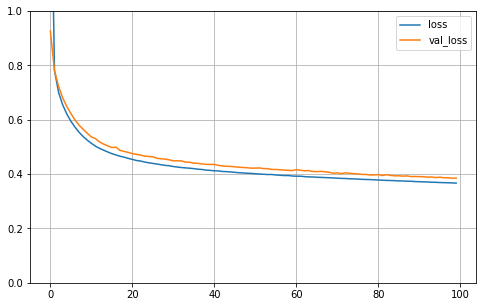

In [10]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)

In [11]:
model.evaluate([xtest_scaled_wide, xtest_scaled_deep], ytest, verbose=0)

0.3778931200504303